In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import yaml

In [2]:
# define global variables for file managment
file_path = 'exps.xlsx'
sheet_name = 'complete-graph-clusters'

In [3]:
params = 0.5, .4, .1

In [4]:
sum(params)

1.0

## Old Models Performances

In [5]:
old_models_data = pd.read_excel(file_path, sheet_name="old-models")
old_models_avg_pre = pd.DataFrame(old_models_data.mean(axis=0))
old_models_avg_pre

,0
SB,0.16565
GSB,0.18783
GSBW-7,0.21168


In [6]:
old_best_model = old_models_avg_pre.max().values[0]
old_best_model

0.21168000000000006

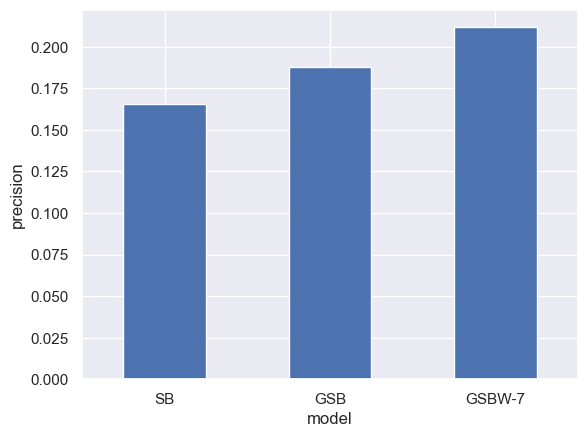

In [7]:
ax = old_models_avg_pre.plot.bar(rot=0)
ax.legend().remove()
ax.set_ylabel("precision")
ax.set_xlabel("model")
plt.show()

## Intoducing Pruned GSB (PGSB) and conceptualized GSB (CGSB)

### Performance based on the size of spectral clustering

In [8]:
data = [0, 0, 0]

In [9]:
data[0] = pd.read_excel('exps.xlsx', sheet_name=sheet_name)
data[0]

,PGSB-30,CGSB-30,PGSB-50,CGSB-50,PGSB-70,CGSB-70,PGSB-90,CGSB-90,PGSB-110,CGSB-110,PGSB-130,CGSB-130,PGSB-150,CGSB-150,PGSB-170,CGSB-170,avg_pre,%prune
0,0.303,0.294,0.303,0.298,0.344,0.298,0.321,0.298,0.321,0.299,0.321,0.298,0.321,0.298,0.321,0.299,0.20990,29.326771
1,0.190,0.076,0.195,0.061,0.199,0.061,0.190,0.061,0.190,0.069,0.190,0.062,0.190,0.062,0.190,0.069,0.24283,27.473101
2,0.173,0.175,0.173,0.174,0.173,0.175,0.173,0.176,0.148,0.177,0.173,0.176,0.173,0.176,0.173,0.177,0.22871,33.625574
3,0.114,0.128,0.114,0.128,0.114,0.128,0.093,0.128,0.114,0.129,0.114,0.128,0.114,0.128,0.114,0.129,0.24238,22.624413
4,0.300,0.311,0.300,0.309,0.300,0.313,0.300,0.309,0.300,0.314,0.300,0.309,0.300,0.309,0.300,0.314,0.22397,34.078264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.332,0.273,0.332,0.274,0.332,0.273,0.332,0.275,0.332,0.275,0.332,0.275,0.332,0.275,0.332,0.275,NaN,NaN
96,0.379,0.361,0.379,0.364,0.379,0.367,0.379,0.358,0.379,0.359,0.234,0.358,0.379,0.358,0.379,0.359,NaN,NaN
97,0.145,0.124,0.138,0.124,0.138,0.125,0.156,0.125,0.145,0.127,0.145,0.125,0.156,0.125,0.145,0.127,NaN,NaN
98,0.602,0.602,0.602,0.602,0.602,0.603,0.602,0.602,0.602,0.602,0.602,0.602,0.602,0.602,0.602,0.602,NaN,NaN


### Prepare data for ploting and analysis to gain insight

In [10]:
clusters_experiment = data[0].iloc[:, :-2]
clusters_experiment

,PGSB-30,CGSB-30,PGSB-50,CGSB-50,PGSB-70,CGSB-70,PGSB-90,CGSB-90,PGSB-110,CGSB-110,PGSB-130,CGSB-130,PGSB-150,CGSB-150,PGSB-170,CGSB-170
0,0.303,0.294,0.303,0.298,0.344,0.298,0.321,0.298,0.321,0.299,0.321,0.298,0.321,0.298,0.321,0.299
1,0.190,0.076,0.195,0.061,0.199,0.061,0.190,0.061,0.190,0.069,0.190,0.062,0.190,0.062,0.190,0.069
2,0.173,0.175,0.173,0.174,0.173,0.175,0.173,0.176,0.148,0.177,0.173,0.176,0.173,0.176,0.173,0.177
3,0.114,0.128,0.114,0.128,0.114,0.128,0.093,0.128,0.114,0.129,0.114,0.128,0.114,0.128,0.114,0.129
4,0.300,0.311,0.300,0.309,0.300,0.313,0.300,0.309,0.300,0.314,0.300,0.309,0.300,0.309,0.300,0.314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.332,0.273,0.332,0.274,0.332,0.273,0.332,0.275,0.332,0.275,0.332,0.275,0.332,0.275,0.332,0.275
96,0.379,0.361,0.379,0.364,0.379,0.367,0.379,0.358,0.379,0.359,0.234,0.358,0.379,0.358,0.379,0.359
97,0.145,0.124,0.138,0.124,0.138,0.125,0.156,0.125,0.145,0.127,0.145,0.125,0.156,0.125,0.145,0.127
98,0.602,0.602,0.602,0.602,0.602,0.603,0.602,0.602,0.602,0.602,0.602,0.602,0.602,0.602,0.602,0.602


In [11]:
cls_avg = data[0]["avg_pre"].dropna().values
cls_avg

array([0.2099 , 0.24283, 0.22871, 0.24238, 0.22397, 0.24279, 0.20793,
       0.2417 , 0.22173, 0.24386, 0.21438, 0.24366, 0.21121, 0.24376,
       0.21396, 0.24366])

In [12]:
cls_prune_per = data[0]["%prune"].dropna().values
cls_prune_per

array([29.32677072, 27.47310124, 33.62557397, 22.62441274, 34.07826427,
       30.82281806, 24.98245386, 28.92985587, 32.6022089 , 29.46745883,
       28.3814062 , 27.74868191, 25.93233785, 26.17314527, 30.42914658,
       28.56484307])

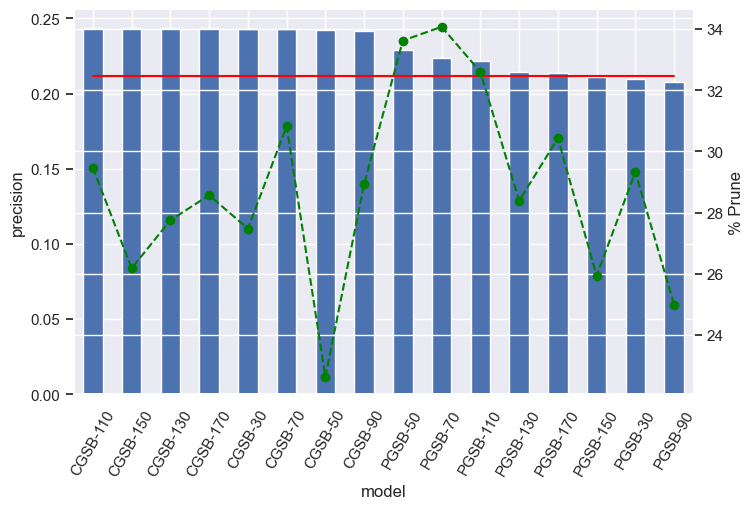

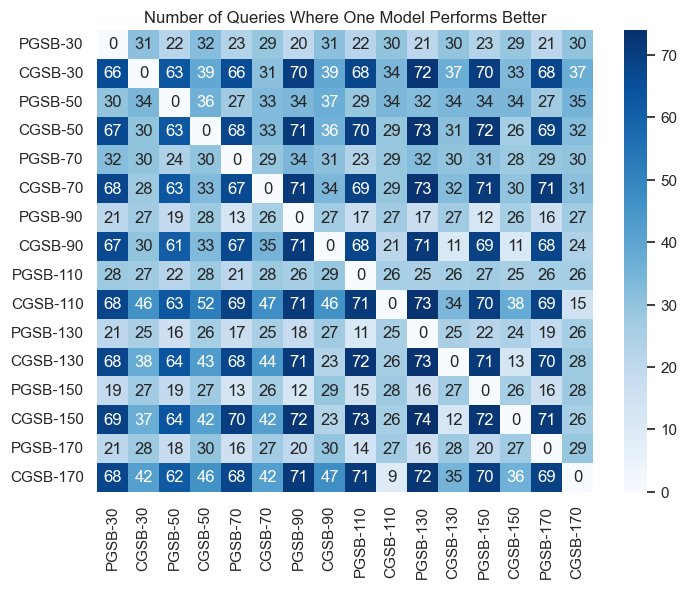

In [13]:
from utils_visual import *
plot_experiment(clusters_experiment, cls_avg, cls_prune_per, old_best_model)

cm = compare_models(clusters_experiment)#.iloc[:, 1::2]) # compare only cgsb's
plot_heatmap(cm) 

In [14]:
# evaluated_models = evaluate_models(cm, cls_avg[1::2], cls_prune_per[1::2], *params)
evaluated_models = evaluate_models(cm, cls_avg, cls_prune_per, *params)
print(evaluated_models)

{'PGSB-30': 0.2446, 'CGSB-30': 0.3889, 'PGSB-50': 0.2884, 'CGSB-50': 0.3762, 'PGSB-70': 0.271, 'CGSB-70': 0.3846, 'PGSB-90': 0.2182, 'CGSB-90': 0.3613, 'PGSB-110': 0.2513, 'CGSB-110': 0.4043, 'PGSB-130': 0.2231, 'CGSB-130': 0.3825, 'PGSB-150': 0.2197, 'CGSB-150': 0.3813, 'PGSB-170': 0.233, 'CGSB-170': 0.3954}


### Performance based on the size of spectral clustering and similarity between nodes

In [15]:
data[1] = pd.read_excel('exps.xlsx', sheet_name=f"{sheet_name}-sim")
data[1]

,PGSB-30-0.1,CGSB-30-0.1,PGSB-30-0.3,CGSB-30-0.3,PGSB-30-0.5,CGSB-30-0.5,PGSB-30-0.7,CGSB-30-0.7,PGSB-50-0.1,CGSB-50-0.1,...,PGSB-170-0.1,CGSB-170-0.1,PGSB-170-0.3,CGSB-170-0.3,PGSB-170-0.5,CGSB-170-0.5,PGSB-170-0.7,CGSB-170-0.7,avg_pre,%prune
0,0.312,0.299,0.323,0.299,0.307,0.301,0.271,0.297,0.337,0.294,...,0.315,0.284,0.334,0.299,0.241,0.299,0.263,0.299,0.23351,64.230448
1,0.106,0.060,0.110,0.059,0.076,0.049,0.060,0.057,0.176,0.060,...,0.177,0.071,0.078,0.059,0.065,0.069,0.078,0.069,0.24342,67.042402
2,0.172,0.174,0.170,0.174,0.187,0.175,0.191,0.174,0.174,0.175,...,0.172,0.181,0.175,0.177,0.186,0.177,0.172,0.177,0.23651,80.562444
3,0.100,0.129,0.105,0.130,0.105,0.128,0.154,0.129,0.105,0.128,...,0.110,0.129,0.104,0.129,0.111,0.130,0.097,0.128,0.24302,80.339502
4,0.295,0.313,0.281,0.313,0.305,0.307,0.294,0.306,0.295,0.313,...,0.298,0.311,0.320,0.314,0.275,0.309,0.098,0.310,0.23684,88.933759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.280,0.274,0.276,0.274,0.274,0.274,0.276,0.273,0.308,0.274,...,0.287,0.273,0.269,0.275,0.277,0.275,0.289,0.275,NaN,NaN
96,0.343,0.365,0.351,0.358,0.380,0.367,0.285,0.367,0.318,0.367,...,0.312,0.359,0.343,0.359,0.240,0.347,0.379,0.359,NaN,NaN
97,0.131,0.125,0.172,0.125,0.124,0.122,0.122,0.126,0.131,0.125,...,0.135,0.125,0.101,0.127,0.122,0.126,0.131,0.124,NaN,NaN
98,0.602,0.603,0.602,0.603,0.602,0.603,0.602,0.602,0.602,0.603,...,0.602,0.602,0.602,0.602,0.603,0.602,0.602,0.602,NaN,NaN


### Prepare data for ploting and analysis to gain insight

In [16]:
cls_sim_experiment = data[1].iloc[:, :-2]
cls_sim_experiment

,PGSB-30-0.1,CGSB-30-0.1,PGSB-30-0.3,CGSB-30-0.3,PGSB-30-0.5,CGSB-30-0.5,PGSB-30-0.7,CGSB-30-0.7,PGSB-50-0.1,CGSB-50-0.1,...,PGSB-150-0.7,CGSB-150-0.7,PGSB-170-0.1,CGSB-170-0.1,PGSB-170-0.3,CGSB-170-0.3,PGSB-170-0.5,CGSB-170-0.5,PGSB-170-0.7,CGSB-170-0.7
0,0.312,0.299,0.323,0.299,0.307,0.301,0.271,0.297,0.337,0.294,...,0.347,0.299,0.315,0.284,0.334,0.299,0.241,0.299,0.263,0.299
1,0.106,0.060,0.110,0.059,0.076,0.049,0.060,0.057,0.176,0.060,...,0.159,0.069,0.177,0.071,0.078,0.059,0.065,0.069,0.078,0.069
2,0.172,0.174,0.170,0.174,0.187,0.175,0.191,0.174,0.174,0.175,...,0.176,0.177,0.172,0.181,0.175,0.177,0.186,0.177,0.172,0.177
3,0.100,0.129,0.105,0.130,0.105,0.128,0.154,0.129,0.105,0.128,...,0.092,0.130,0.110,0.129,0.104,0.129,0.111,0.130,0.097,0.128
4,0.295,0.313,0.281,0.313,0.305,0.307,0.294,0.306,0.295,0.313,...,0.265,0.309,0.298,0.311,0.320,0.314,0.275,0.309,0.098,0.310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.280,0.274,0.276,0.274,0.274,0.274,0.276,0.273,0.308,0.274,...,0.289,0.275,0.287,0.273,0.269,0.275,0.277,0.275,0.289,0.275
96,0.343,0.365,0.351,0.358,0.380,0.367,0.285,0.367,0.318,0.367,...,0.224,0.359,0.312,0.359,0.343,0.359,0.240,0.347,0.379,0.359
97,0.131,0.125,0.172,0.125,0.124,0.122,0.122,0.126,0.131,0.125,...,0.131,0.126,0.135,0.125,0.101,0.127,0.122,0.126,0.131,0.124
98,0.602,0.603,0.602,0.603,0.602,0.603,0.602,0.602,0.602,0.603,...,0.602,0.602,0.602,0.602,0.602,0.602,0.603,0.602,0.602,0.602


In [17]:
# split dataframes for each similarity condition letting only cluster size to vary
selected_columns = [
    [
        column
        for i in range(j, 64, 8)  # Iterate over i with a step of 8
        for column in cls_sim_experiment.columns[i:i+2].values  # Get the subset of columns
    ]
    for j in range(0, 8, 2)  # Iterate over j with a step of 2
]

cls_per_sim_list = [cls_sim_experiment[columns] for columns in selected_columns]
cls_per_sim_list[0].head()

,PGSB-30-0.1,CGSB-30-0.1,PGSB-50-0.1,CGSB-50-0.1,PGSB-70-0.1,CGSB-70-0.1,PGSB-90-0.1,CGSB-90-0.1,PGSB-110-0.1,CGSB-110-0.1,PGSB-130-0.1,CGSB-130-0.1,PGSB-150-0.1,CGSB-150-0.1,PGSB-170-0.1,CGSB-170-0.1
0,0.312,0.299,0.337,0.294,0.335,0.298,0.342,0.298,0.341,0.299,0.322,0.299,0.320,0.299,0.315,0.284
1,0.106,0.060,0.176,0.060,0.180,0.061,0.181,0.060,0.181,0.069,0.180,0.069,0.178,0.069,0.177,0.071
2,0.172,0.174,0.174,0.175,0.164,0.176,0.169,0.177,0.166,0.177,0.180,0.180,0.178,0.178,0.172,0.181
3,0.100,0.129,0.105,0.128,0.105,0.132,0.110,0.127,0.105,0.128,0.111,0.129,0.110,0.129,0.110,0.129
4,0.295,0.313,0.295,0.313,0.298,0.309,0.317,0.310,0.317,0.310,0.301,0.313,0.304,0.313,0.298,0.311


In [18]:
cls_sim_avg = data[1]['avg_pre'].dropna().values
cls_sim_avg_list = [
    np.array([
        avg
        for i in range(j, 64, 8)  # Iterate over i with a step of 8
        for avg in cls_sim_avg[i:i+2]  # Get the subset of avgs
    ])
    for j in range(0, 8, 2)  # Iterate over j with a step of 2
]

In [19]:
cls_sim_prune_per = data[1]['%prune'].dropna().values

cls_sim_prune_per_list = [
    np.array([
        prune_per
        for i in range(j, 64, 8)  # Iterate over i with a step of 8
        for prune_per in cls_sim_prune_per[i:i+2]  # Get the subset of avgs
    ])
    for j in range(0, 8, 2)  # Iterate over j with a step of 2
]

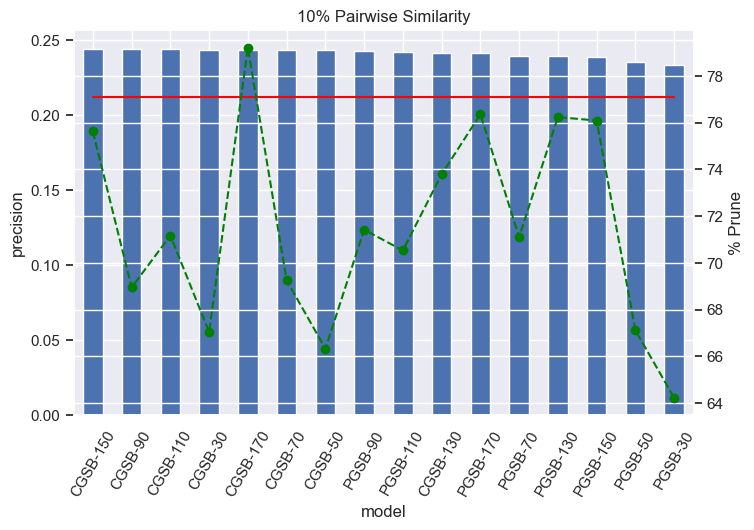

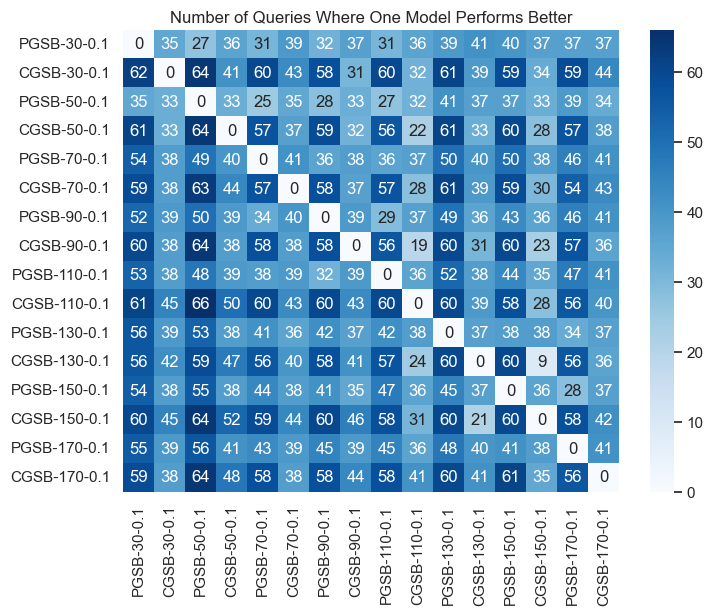

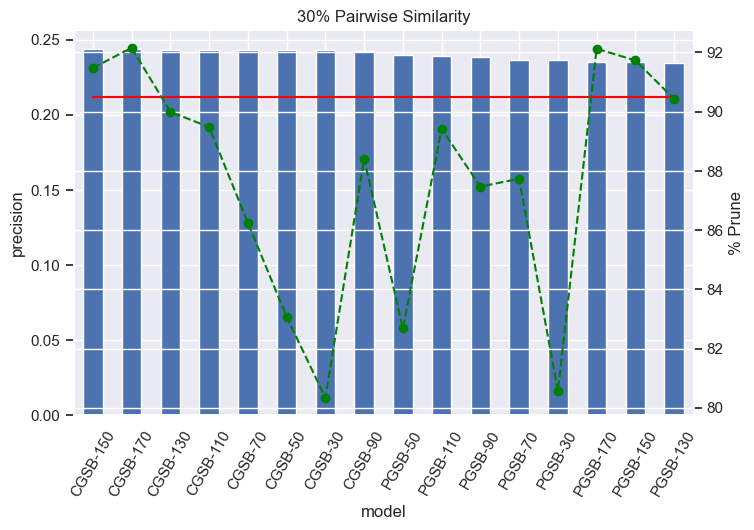

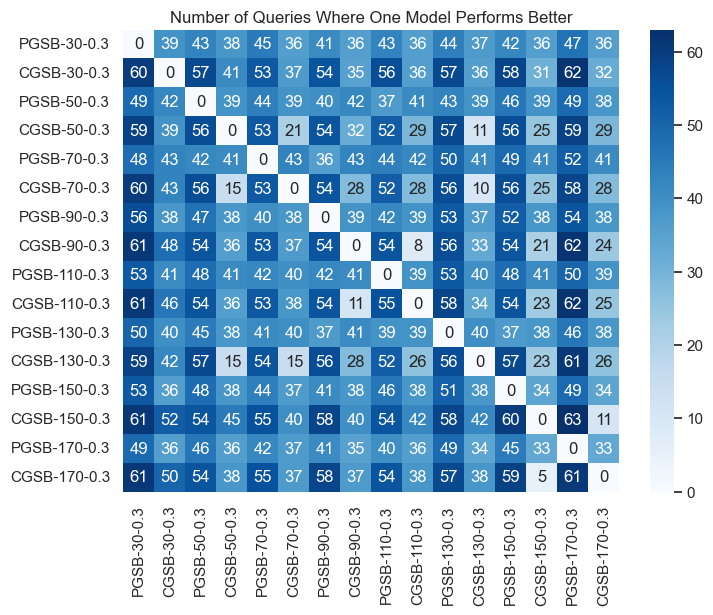

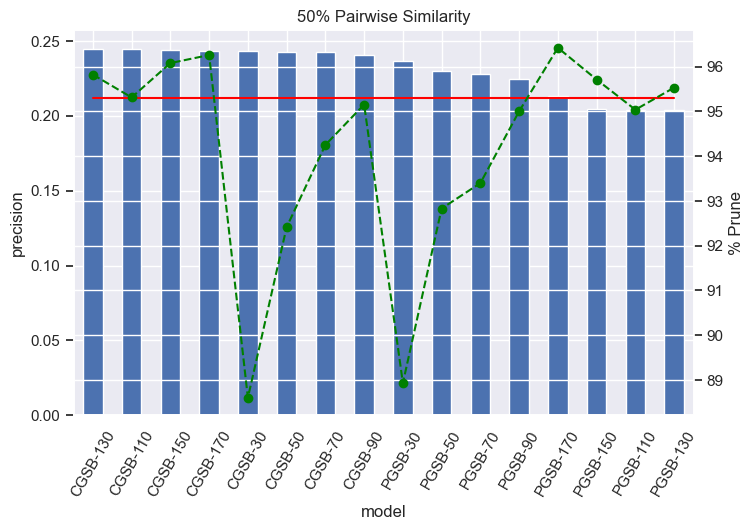

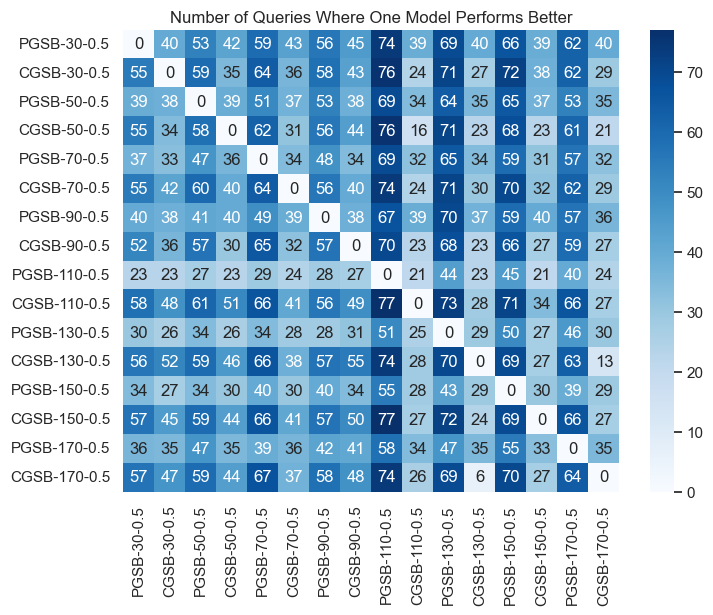

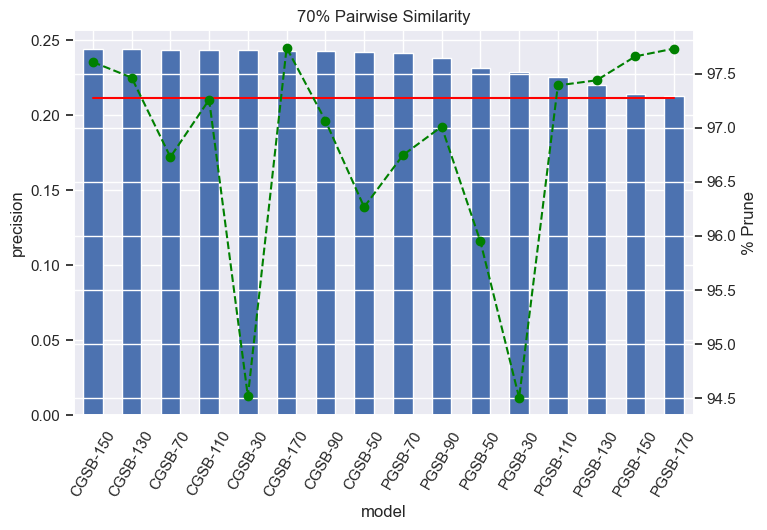

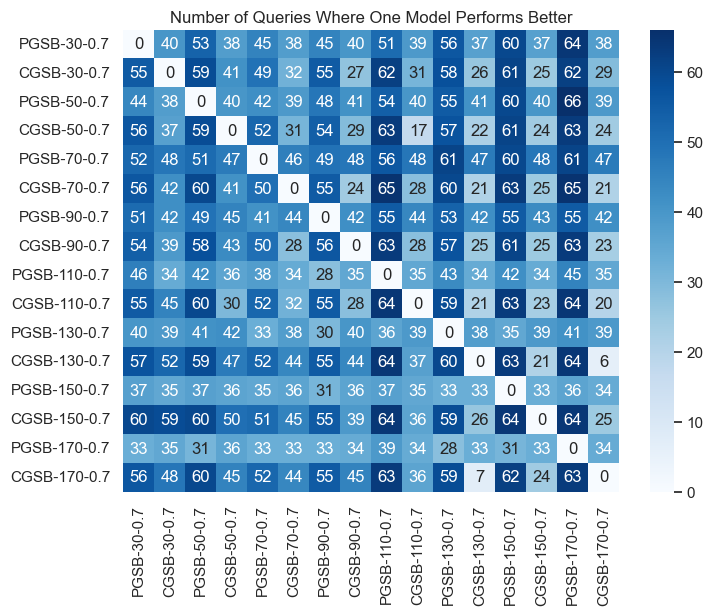

In [20]:
sims = [10, 30, 50, 70]
for i in range(len(cls_per_sim_list)):
    plot_experiment(cls_per_sim_list[i], cls_sim_avg_list[i], cls_sim_prune_per_list[i], old_best_model,
                    title=f"{sims[i]}% Pairwise Similarity")
    
    # cm = compare_models(cls_per_sim_list[i].iloc[:, 1::2]) # compare only cgsb's
    cm = compare_models(cls_per_sim_list[i])
    plot_heatmap(cm) 

    # em = evaluate_models(cm, cls_sim_avg_list[i][1::2], cls_sim_prune_per_list[i][1::2], *params)
    em = evaluate_models(cm, cls_sim_avg_list[i], cls_sim_prune_per_list[i], *params)
    evaluated_models.update(em)

### Performance based on the size of spectral clustering and edge (wout_avg * coeff) between nodes

In [21]:
data[2] = pd.read_excel('exps.xlsx', sheet_name=f"{sheet_name}-avg")

### Prepare data for ploting and analysis to gain insight
cls_avg_experiment = data[2].iloc[:, :-2]

# split dataframes for each similarity condition letting only cluster size to vary
selected_columns = [
    [
        column
        for i in range(j, 64, 8)  # Iterate over i with a step of 8
        for column in cls_avg_experiment.columns[i:i+2].values  # Get the subset of columns
    ]
    for j in range(0, 8, 2)  # Iterate over j with a step of 2
]

cls_per_avg_list = [cls_avg_experiment[columns] for columns in selected_columns]
cls_per_avg_list[0].head()

cls_avg_avg = data[2]['avg_pre'].dropna().values

cls_avg_avg_list = [
    np.array([
        avg
        for i in range(j, 64, 8)  # Iterate over i with a step of 8
        for avg in cls_avg_avg[i:i+2]  # Get the subset of avgs
    ])
    for j in range(0, 8, 2)  # Iterate over j with a step of 2
]

cls_avg_prune_per = data[2]['%prune'].dropna().values

cls_avg_prune_per_list = [
    np.array([
        prune_per
        for i in range(j, 64, 8)  # Iterate over i with a step of 8
        for prune_per in cls_avg_prune_per[i:i+2]  # Get the subset of avgs
    ])
    for j in range(0, 8, 2)  # Iterate over j with a step of 2
]

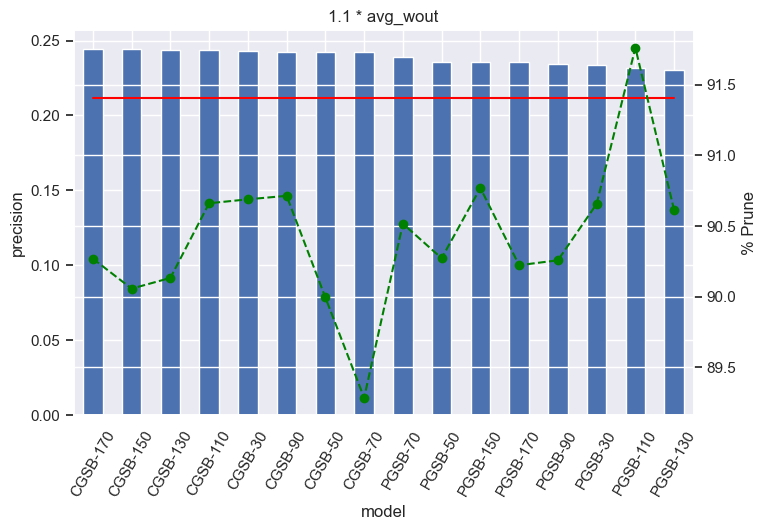

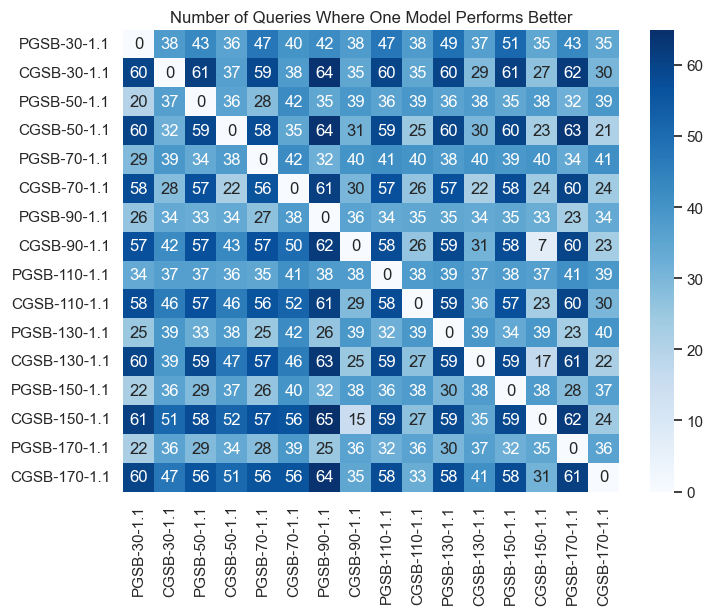

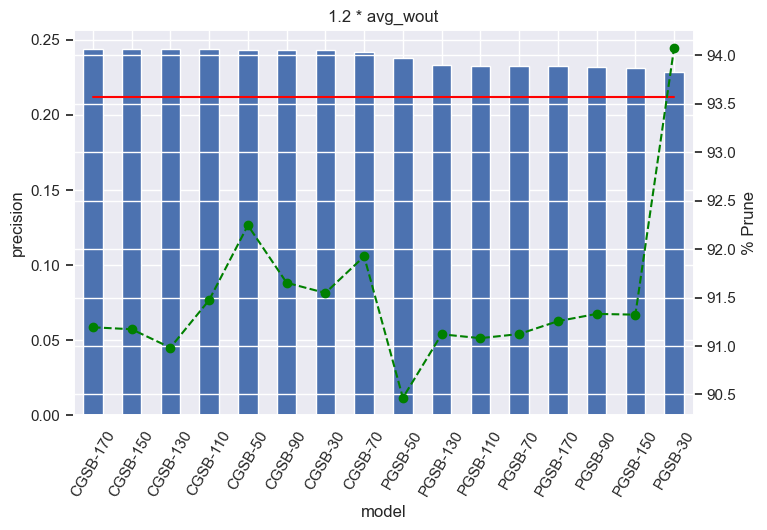

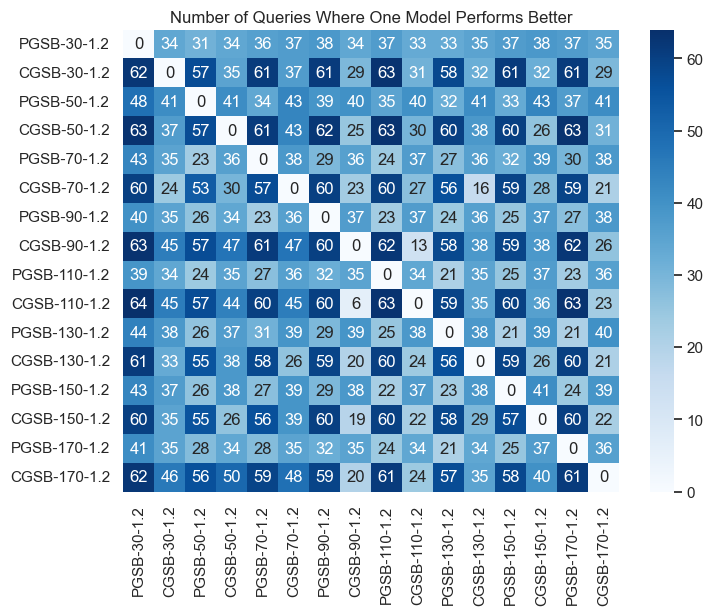

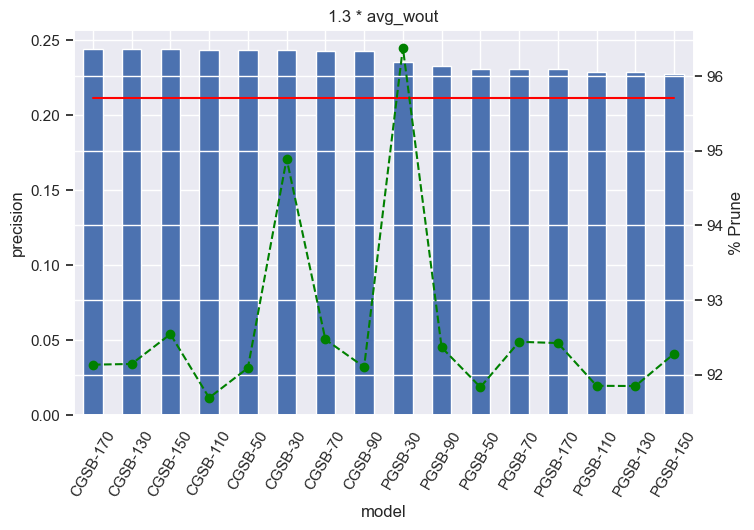

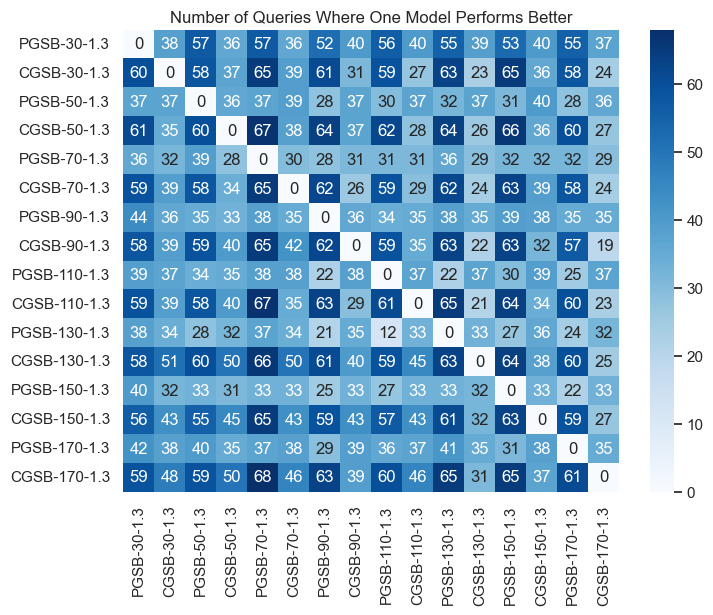

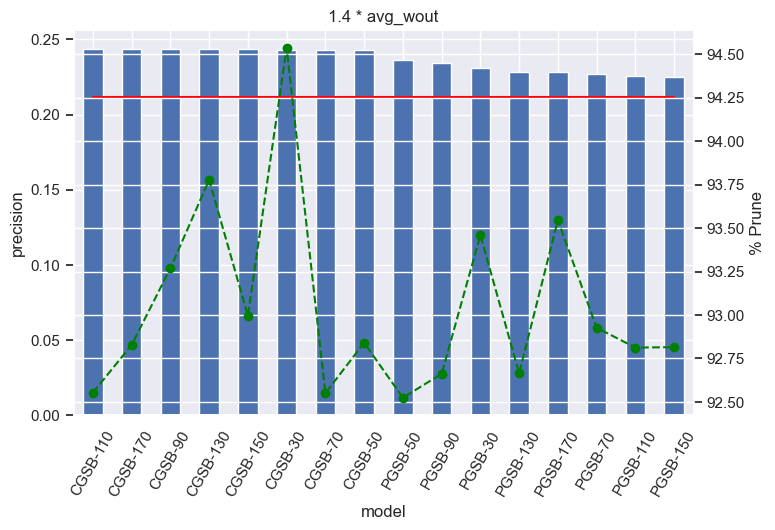

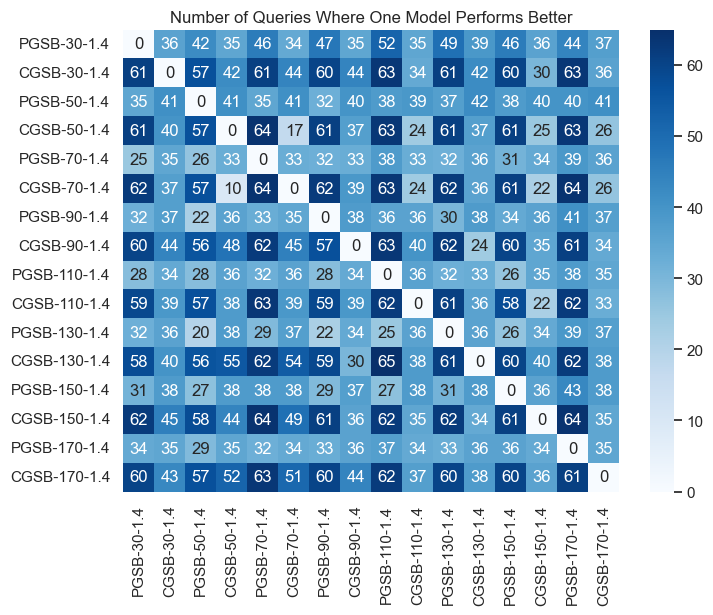

In [22]:
coeffs = [1.1, 1.2, 1.3, 1.4]
for i in range(len(cls_per_sim_list)):
    plot_experiment(cls_per_avg_list[i], cls_avg_avg_list[i], cls_avg_prune_per_list[i], old_best_model,
                    title=f"{coeffs[i]} * avg_wout")
    
    # cm = compare_models(cls_per_avg_list[i].iloc[:, 1::2]) # compare only cgsb's
    cm = compare_models(cls_per_avg_list[i]) # compare only cgsb's
    plot_heatmap(cm) 

    # em = evaluate_models(cm, cls_avg_avg_list[i][1::2], cls_avg_prune_per_list[i][1::2], *params)
    em = evaluate_models(cm, cls_avg_avg_list[i], cls_avg_prune_per_list[i], *params)
    evaluated_models.update(em)

In [23]:
print(evaluated_models)
print(len(evaluated_models))

{'PGSB-30': 0.2446, 'CGSB-30': 0.3889, 'PGSB-50': 0.2884, 'CGSB-50': 0.3762, 'PGSB-70': 0.271, 'CGSB-70': 0.3846, 'PGSB-90': 0.2182, 'CGSB-90': 0.3613, 'PGSB-110': 0.2513, 'CGSB-110': 0.4043, 'PGSB-130': 0.2231, 'CGSB-130': 0.3825, 'PGSB-150': 0.2197, 'CGSB-150': 0.3813, 'PGSB-170': 0.233, 'CGSB-170': 0.3954, 'PGSB-30-0.1': 0.336, 'CGSB-30-0.1': 0.4134, 'PGSB-50-0.1': 0.3285, 'CGSB-50-0.1': 0.3962, 'PGSB-70-0.1': 0.3782, 'CGSB-70-0.1': 0.4088, 'PGSB-90-0.1': 0.3718, 'CGSB-90-0.1': 0.3985, 'PGSB-110-0.1': 0.3737, 'CGSB-110-0.1': 0.425, 'PGSB-130-0.1': 0.3739, 'CGSB-130-0.1': 0.4041, 'PGSB-150-0.1': 0.3744, 'CGSB-150-0.1': 0.4267, 'PGSB-170-0.1': 0.3881, 'CGSB-170-0.1': 0.4295, 'PGSB-30-0.3': 0.3748, 'CGSB-30-0.3': 0.4125, 'PGSB-50-0.3': 0.3875, 'CGSB-50-0.3': 0.391, 'PGSB-70-0.3': 0.4011, 'CGSB-70-0.3': 0.3908, 'PGSB-90-0.3': 0.3991, 'CGSB-90-0.3': 0.4036, 'PGSB-110-0.3': 0.4043, 'CGSB-110-0.3': 0.4082, 'PGSB-130-0.3': 0.3871, 'CGSB-130-0.3': 0.3964, 'PGSB-150-0.3': 0.3942, 'CGSB-150-0.

In [24]:
sorted_evaluated_models = sorted(evaluated_models.items(), key=lambda x: x[1], reverse=True)

In [25]:
models_eval = pd.DataFrame(sorted_evaluated_models, columns=['model', 'value'])
models_eval.head()

,model,value
0,CGSB-110-0.5,0.4618
1,CGSB-170-1.3,0.4555
2,CGSB-150-0.5,0.4539
3,CGSB-130-1.3,0.4531
4,CGSB-170-1.4,0.4516


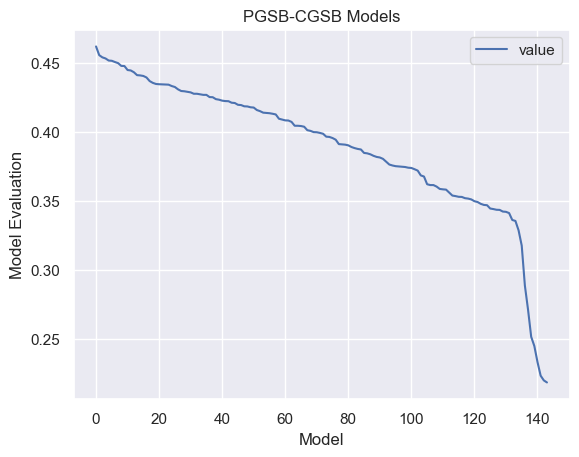

In [26]:
models_eval.plot()
plt.xlabel("Model")
plt.ylabel("Model Evaluation")
plt.title("PGSB-CGSB Models")
plt.show()

In [27]:
# Define regular expression pattern
pattern = r'-(\d+\.\d+)$'

# Extract the matching pattern from the 'cgsb_model' column
models_eval['group'] = models_eval['model'].str.extract(pattern, expand=False)
models_eval['group'].fillna('cls', inplace=True)
models_eval

,model,value,group
0,CGSB-110-0.5,0.4618,0.5
1,CGSB-170-1.3,0.4555,1.3
2,CGSB-150-0.5,0.4539,0.5
3,CGSB-130-1.3,0.4531,1.3
4,CGSB-170-1.4,0.4516,1.4
...,...,...,...
139,PGSB-30,0.2446,cls
140,PGSB-170,0.2330,cls
141,PGSB-130,0.2231,cls
142,PGSB-150,0.2197,cls


In [28]:
top_n = 3
# Group the DataFrame by the extracted 'group' column
grouped_df = models_eval.groupby(by='group')

best_n_per_exp = {}
# Iterate over the groups and print the group name along with the corresponding data
for group, segment in grouped_df:
    # pick each row and convert to dictionary
    for index, row in segment.iloc[:top_n, :2].iterrows():
        best_n_per_exp.update({row["model"]: row["value"]})
    
print(best_n_per_exp)
print(len(best_n_per_exp))

{'CGSB-170-0.1': 0.4295, 'CGSB-150-0.1': 0.4267, 'CGSB-110-0.1': 0.425, 'CGSB-150-0.3': 0.4341, 'CGSB-170-0.3': 0.4236, 'CGSB-30-0.3': 0.4125, 'CGSB-110-0.5': 0.4618, 'CGSB-150-0.5': 0.4539, 'CGSB-130-0.5': 0.4514, 'PGSB-70-0.7': 0.4497, 'CGSB-150-0.7': 0.4477, 'CGSB-130-0.7': 0.4367, 'CGSB-170-1.1': 0.4431, 'CGSB-150-1.1': 0.4344, 'CGSB-110-1.1': 0.4307, 'CGSB-90-1.2': 0.4343, 'CGSB-170-1.2': 0.4342, 'CGSB-50-1.2': 0.4293, 'CGSB-170-1.3': 0.4555, 'CGSB-130-1.3': 0.4531, 'CGSB-150-1.3': 0.4404, 'CGSB-170-1.4': 0.4516, 'CGSB-130-1.4': 0.4505, 'CGSB-150-1.4': 0.4476, 'CGSB-110': 0.4043, 'CGSB-170': 0.3954, 'CGSB-30': 0.3889}
27


In [29]:
best_nm_per_exp = pd.DataFrame(best_n_per_exp.items(), columns=["model", "value"])
best_nm_per_exp = best_nm_per_exp.sort_values(by='value', ascending=False).reset_index(drop=True)
best_nm_per_exp

,model,value
0,CGSB-110-0.5,0.4618
1,CGSB-170-1.3,0.4555
2,CGSB-150-0.5,0.4539
3,CGSB-130-1.3,0.4531
4,CGSB-170-1.4,0.4516
5,CGSB-130-0.5,0.4514
6,CGSB-130-1.4,0.4505
7,PGSB-70-0.7,0.4497
8,CGSB-150-0.7,0.4477
9,CGSB-150-1.4,0.4476


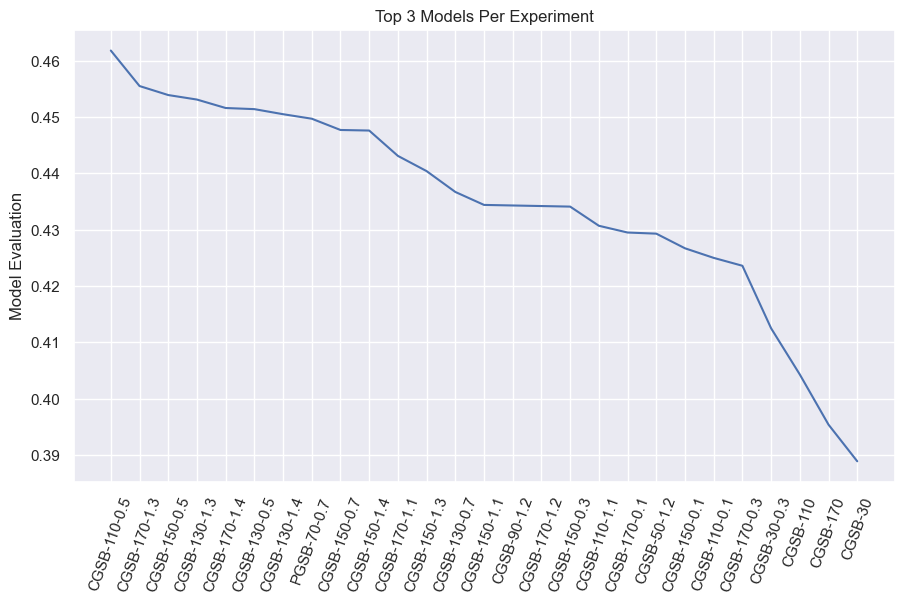

In [30]:
# Plot the DataFrame with all labels displayed
fig, ax = plt.subplots(figsize=(9, 6))

# Set the tick positions and labels
ax.set_xticks(range(len(best_nm_per_exp['model'])))
ax.set_xticklabels(best_nm_per_exp['model'], rotation=70)

# Plot the data
ax.plot(best_nm_per_exp['value'])

plt.tight_layout()
plt.ylabel("Model Evaluation")
plt.title(f"Top {top_n} Models Per Experiment")
plt.show()